# KNN Classification

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.<br>
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:<br>

1. Ease to interpret output

2. Calculation time

3. Predictive Power

# Dataset

Dataset that I am using is about users in social networks. It describes ocial network has several business clients which can put their ads on the social network and one of their clients is a car company who has just launched their brand new luxury SUV for a ridiculous price and we're trying to see which of these users of the social network are going to buy this brand-new SUV.<br>


We are going to build a model that is going to predict if users choose to buy or not based on two variables which are going to be the age and the estimated salary<br>

**Goal is to find right users in right category. We will use classifier to predict user choice to purchase SUV or not**<br>

Key variables/features are : <br>
User ID<br>
Gener: Male or female<br>
Age<br>
Estimated Salary<br>
**Dependent Variable**-Purchased: Categorical variable showing if item is purchased or not.<br>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
feature=[ "Age" , "EstimatedSalary"]

In [4]:
feature

['Age', 'EstimatedSalary']

In [5]:
x,y=dataset[feature] , dataset.Purchased

In [6]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
type(x)

pandas.core.frame.DataFrame

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
dtypes: int64(2)
memory usage: 6.3 KB


In [9]:
x.shape

(400, 2)

In [10]:
type(y)

pandas.core.series.Series

In [11]:
y.shape

(400,)

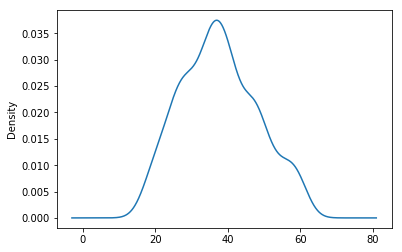

In [12]:
x.Age.plot(kind='density')

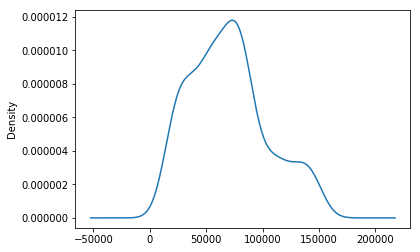

In [13]:
x.EstimatedSalary.plot(kind='density')

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Fitting classifier to the Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

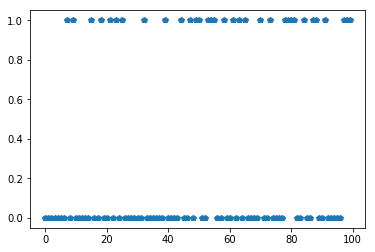

In [19]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

In [20]:
y_test

132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
37     0
134    0
113    0
348    0
12     0
59     0
293    0
140    0
206    1
199    0
176    0
268    1
124    0
344    1
175    0
313    1
78     0
15     0
286    0
102    0
      ..
7      1
260    0
68     0
20     1
107    0
14     0
363    0
304    0
361    1
329    1
336    1
64     0
55     0
106    0
300    1
229    1
122    0
373    1
395    1
325    0
380    0
253    1
56     0
8      0
190    0
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

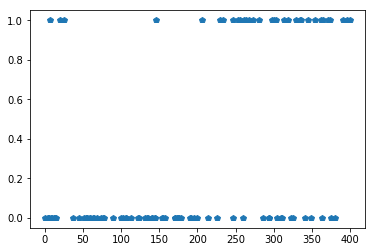

In [21]:
plt.plot(y_test, "p")

## Making the confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

**To explain confusion matrix, we have correct values in Diagnols i.e TP and TN. So we have 64+29=93 correct predicts. <br>
Then we have values other than diagnols which are not correct predictions i.e 4+3=7. Out of our 100 values in x_test set, we predicted 93 correct and 7 were incorrect.**

## Checking accuracy score in Percentage

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.93

### Visualizing the Trainset results

In [26]:
from matplotlib.colors import ListedColormap

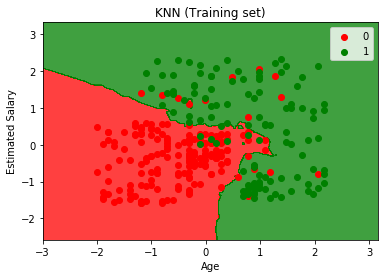

In [27]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red points are the observation points where purchase not done i.e =0 . Green points represent point where purchased is done i.e equal to 1.<br>
Ofcourse one may find point where users with green dots are in red zone of classifier and vice versa. That's where prediction is failed.<br>
As We can see there are not many mismatched point. Red data points are in red mostly while green remains in their territory.It shows a good predict with few predict lapses. 93% is a good prediction value overall

**As classifier plot is not a straight line so, it shows it is non-linear. Prediction boundary is of irregular pattern.It partly is due to algorithm as KNN has such irregular distribution.
Age feature is much of close to mean. Population that lies in mid age to older age tend to buy SUV new model. Whereas people with a higher estimated salary are more likely to buy SUV.**

### Visualizing the Test set results

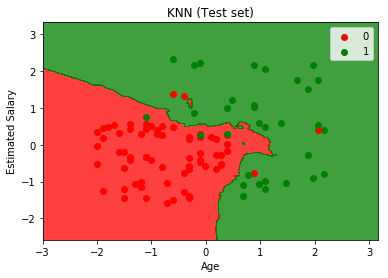

In [28]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Results from test set are aligned with predicted results as above. We can even confirm our confusion matrix by counting incorrect prediction point. These are 7 in total. The data points that are green but, they are in red area while those points that red but are in green zone are our incorrect predictions. 